<a href="https://colab.research.google.com/github/Tarun-Kumar-Arcot/Loan-Eligibility-Prediction-machine-learning-algorithms/blob/main/Loan_eligibility_prediction_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# New Section

1. Understanding the dataset

In [112]:
dataset = pd.read_csv("train.csv")

In [113]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
dataset.shape

(614, 13)

**2.Data Preprocessing**
1. Data Cleaning 
2. Data Transformation
3. Data Reuction

1. Data Cleaning 

In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [116]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Exploring Dataset**

In [117]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


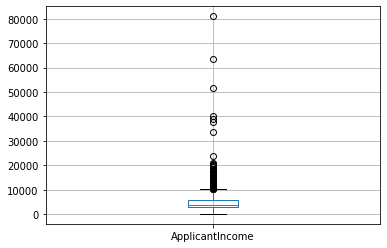

In [118]:
dataset.boxplot(column='ApplicantIncome')

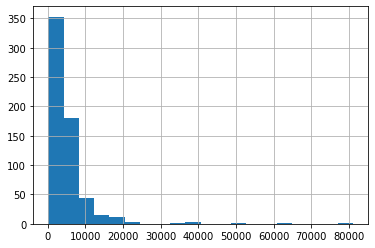

In [119]:
dataset['ApplicantIncome'].hist(bins=20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


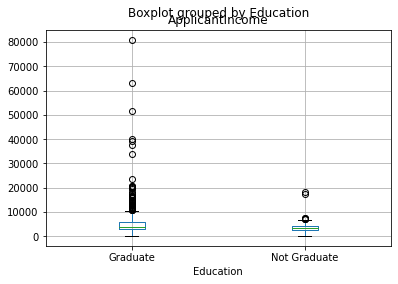

In [120]:
dataset.boxplot(column='ApplicantIncome' ,by='Education')

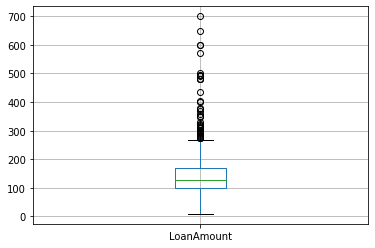

In [121]:
dataset.boxplot(column='LoanAmount')

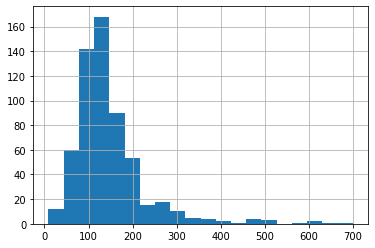

In [122]:
dataset['LoanAmount'].hist(bins=20)

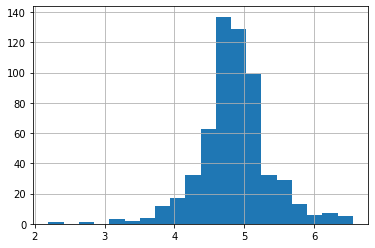

In [123]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [124]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [125]:
dataset['LoanAmount'].mean()

146.41216216216216

In [126]:
dataset['LoanAmount'].replace(np.NaN, dataset['LoanAmount'].mean()).head(15)

0     146.412162
1     128.000000
2      66.000000
3     120.000000
4     141.000000
5     267.000000
6      95.000000
7     158.000000
8     168.000000
9     349.000000
10     70.000000
11    109.000000
12    200.000000
13    114.000000
14     17.000000
Name: LoanAmount, dtype: float64

In [127]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [128]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [129]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [130]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)       

In [131]:
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log = dataset.LoanAmount_log.fillna(dataset.LoanAmount.mean())

In [132]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [133]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [134]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [135]:
dataset['TotalIncome']= dataset['ApplicantIncome']+ dataset['CoapplicantIncome']
dataset['TotalIncome_log'] =np.log(dataset['TotalIncome'])

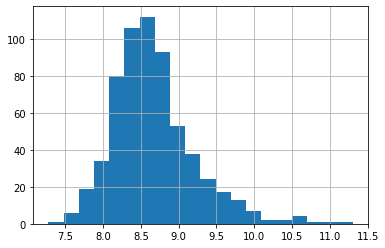

In [136]:
dataset['TotalIncome_log'].hist(bins=20)

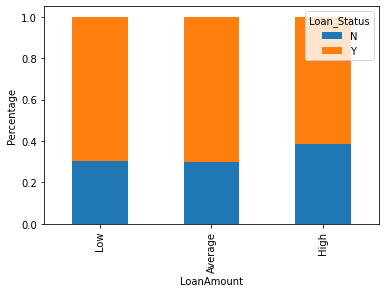

In [193]:
bins=[0,100,200,700]
group=['Low','Average','High']
dataset['LoanAmount_bin']=pd.cut(dataset['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(dataset['LoanAmount_bin'],dataset['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

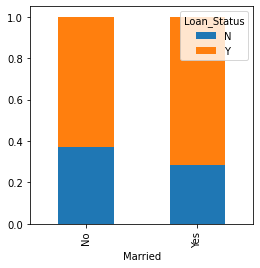

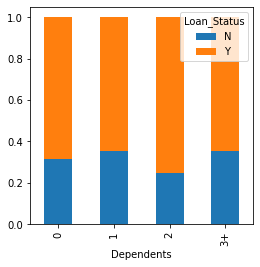

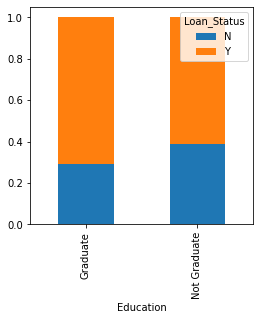

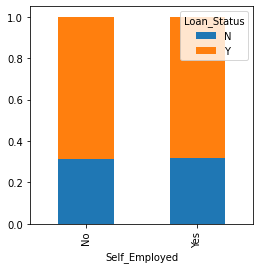

In [194]:
Married=pd.crosstab(dataset['Married'],dataset['Loan_Status'])
Dependents=pd.crosstab(dataset['Dependents'],dataset['Loan_Status'])
Education=pd.crosstab(dataset['Education'],dataset['Loan_Status'])
Self_Employed=pd.crosstab(dataset['Self_Employed'],dataset['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

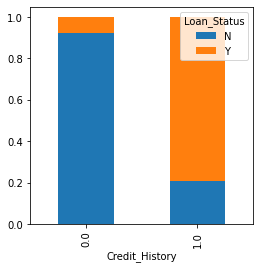

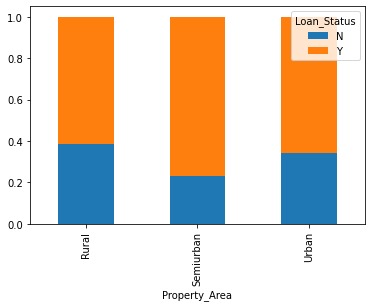

In [195]:
Credit_History=pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'])
Property_Area=pd.crosstab(dataset['Property_Area'],dataset['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

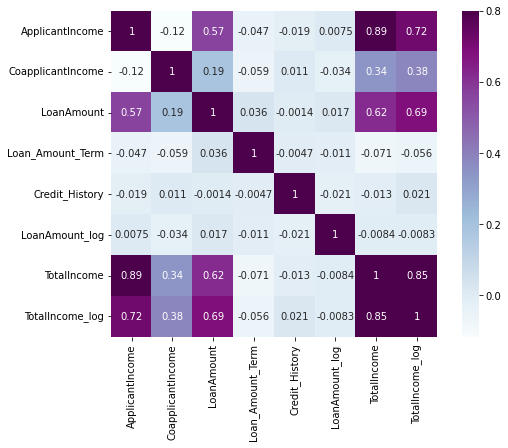

In [202]:
matrix = dataset.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)
#Variables with dark colour means there corelation is more.

In [139]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,146.412162,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [140]:
import matplotlib.pyplot as plt 

In [141]:
Y = dataset[dataset.Loan_Status == "Y"]

In [142]:
N = dataset[dataset.Loan_Status == "N"]

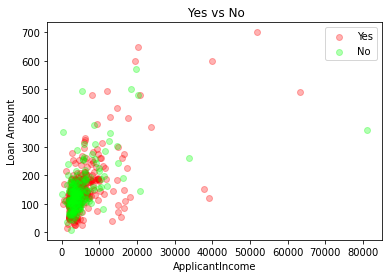

In [143]:
plt.title(" Yes vs No")
plt.xlabel("ApplicantIncome")
plt.ylabel("Loan Amount")
plt.scatter(Y.ApplicantIncome, Y.LoanAmount, color = "red", label = "Yes", alpha = 0.3)
plt.scatter(N.ApplicantIncome, N.LoanAmount, color = "lime", label = "No", alpha = 0.3)
plt.legend()
plt.show()

2. data transformation

In [144]:
X=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values 
y=dataset.iloc[:,12].values

In [145]:
X

array([['Male', 'No', '0', ..., 1.0, 146.41216216216213, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [146]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Spliting the dataset into training and testing dataset

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [148]:
print(x_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [149]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_x = LabelEncoder()

In [150]:
for i in range (0, 5):
  x_train[:, i]= labelEncoder_x.fit_transform(x_train[:,i])

In [151]:
x_train[:, i] = labelEncoder_x.fit_transform(x_train[:, 7])

In [152]:
x_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 5858.0],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 11250.0],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 8334.0],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 6033.0],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 6486.0]], dtype=object)

In [153]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

In [154]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [155]:
for i in range (0, 5):
  x_test[:, i]= labelEncoder_x.fit_transform(x_test[:,i])

In [156]:
x_test[:, 7] = labelEncoder_x.fit_transform(x_test[:, 7])

In [157]:
labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [158]:
x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [159]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [160]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [216]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
DTClassifier=DecisionTreeClassifier(criterion='entropy',random_state=0) 
DTClassifier.fit(x_train,y_train)
y_pred_DT=DTClassifier.predict(x_test)
print("y_pred_DT=",y_pred_DT)
print("\t")
print("y_test=",y_test)
print("\n")
from sklearn import metrics
from sklearn.metrics import accuracy_score
print ('The accuracy of decision tree classifier is ', metrics.accuracy_score(y_pred_DT, y_test))
print("classification report for logistic regression :-\n",classification_report(y_test, y_pred_DT))
print("\n")
print("Confusion matrix:\n")
confusion_matrix(y_test, y_pred_DT)

y_pred_DT= [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0]
	
y_test= [1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 1 1 0 1]


The accuracy of decision tree classifier is  0.4146341463414634
classification report for logistic regression :-
               precision    recall  f1-score   support

           0       0.30      0.88      0.45        33
           1       0.85      0.24      0.38        90

    accuracy                           0.41       123
   macro avg       0.57      0.56      0.41       123
weighted avg       0.70      0.41      0.40       123



Confusion matrix:



array([[29,  4],
       [68, 22]])

In [217]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)
y_pred_NB= NBClassifier.predict(x_test)
print("y_pred_NB=",y_pred_NB)
print ('The accuracy of Naive Bayes is ', metrics.accuracy_score(y_pred_NB, y_test))
print("classification report for logistic regression :-\n",classification_report(y_test, y_pred_NB))
print("\n")
print("Confusion matrix:\n")
confusion_matrix(y_test, y_pred_NB)

y_pred_NB= [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
The accuracy of Naive Bayes is  0.8130081300813008
classification report for logistic regression :-
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        33
           1       0.82      0.96      0.88        90

    accuracy                           0.81       123
   macro avg       0.80      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123



Confusion matrix:



array([[14, 19],
       [ 4, 86]])

In [218]:
#import ml model from sklearn package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred_LG = logistic_model.predict(x_test)
print('Coeeficient of model :', logistic_model.coef_)
print('Intercept of model', logistic_model.intercept_)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))
print("classification report for logistic regression :-\n",classification_report(y_test, y_pred_LG))
print("\n")
print("Confusion matrix:\n")
confusion_matrix(y_test, y_pred_LG)

Coeeficient of model : [[-0.03865167  0.16341873  0.10978006 -0.16487118  0.00537704  1.35560362
  -0.21110458 -0.08614693]]
Intercept of model [0.7289578]
accuracy_score overall : 0.8085539714867617
accuracy_score percent : 80.86
classification report for logistic regression :-
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        33
           1       0.82      0.96      0.88        90

    accuracy                           0.81       123
   macro avg       0.80      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123



Confusion matrix:



array([[14, 19],
       [ 4, 86]])

In [219]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 600)
rf.fit(x_train,y_train)
predictions_rfc = rf.predict(x_test)
score = rf.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))
print('Classification report for random forest:',classification_report(y_test, predictions_rfc))
print("\n")
print("Confusion matrix:\n")
confusion_matrix(y_test, predictions_rfc)

accuracy_score overall : 1.0
accuracy_score percent : 100.0
Classification report for random forest:               precision    recall  f1-score   support

           0       0.38      0.70      0.49        33
           1       0.84      0.58      0.68        90

    accuracy                           0.61       123
   macro avg       0.61      0.64      0.59       123
weighted avg       0.71      0.61      0.63       123



Confusion matrix:



array([[23, 10],
       [38, 52]])

In [220]:
from sklearn import svm
from sklearn.metrics import accuracy_score
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
x_train_prediction = classifier.predict(x_train)
y_pred_SVM = classifier.predict(x_test)
training_data_accuray = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)
print('Classification report for support vector machine:\n',classification_report(y_test, y_pred_SVM))
print("\n")
print("Confusion matrix:\n")
confusion_matrix(y_test, y_pred_SVM)

Accuracy on training data :  0.8044806517311609
Classification report for support vector machine:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



Confusion matrix:



array([[14, 19],
       [ 2, 88]])

In [221]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_KNN = knn.predict(x_test)
x_train_prediction = knn.predict(x_train)
training_data_accuray = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data : ', training_data_accuray)
print('Classification report for support vector machine:\n',classification_report(y_test, y_pred_KNN))
print("\n")
print("Confusion matrix:\n")
confusion_matrix(y_test, y_pred_KNN)

Accuracy on training data :  0.835030549898167
Classification report for support vector machine:
               precision    recall  f1-score   support

           0       0.62      0.45      0.53        33
           1       0.82      0.90      0.86        90

    accuracy                           0.78       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.77      0.78      0.77       123



Confusion matrix:



array([[15, 18],
       [ 9, 81]])

In [167]:
import pandas as pd


In [168]:
import pandas as sort_values

In [169]:
testdata = pd.read_csv("test.csv")

In [170]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [171]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [172]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [173]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)

In [174]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

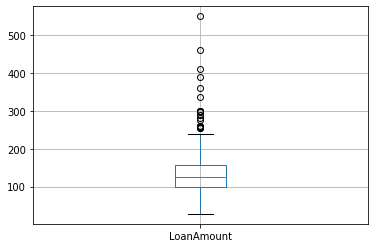

In [175]:
testdata.boxplot(column='LoanAmount')

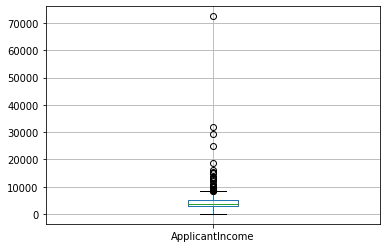

In [176]:
testdata.boxplot(column='ApplicantIncome')

In [177]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [178]:
testdata['LoanAmount_log'] =np.log(testdata['LoanAmount'])

In [179]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
dtype: int64

In [180]:
testdata['TotalIncome'] = testdata['ApplicantIncome']+testdata['CoapplicantIncome']
testdata['TotalIncome_log'] =np.log(testdata['TotalIncome'])

In [181]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [182]:
test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [183]:
for i in range(0,5):
  test[:,i]=labelEncoder_x.fit_transform(test[:,i])
test[:,7]=labelEncoder_x.fit_transform(test[:,7])

In [184]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [185]:
test = ss.fit_transform(test)

In [186]:
pred = rf.predict(test)

In [187]:
pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,